In [ ]:
'''
pls add this in .vscode/settings.json
{
    ...
    "files.associations":{
        "*.pySec":"python"
    },
    ...
}
'''

In [1]:
exec(open("1.loadData.pySec").read())

step 1 is complete


In [ ]:
print('total training cat images:', len(os.listdir(trainCatDir)))
print('total training dog images:', len(os.listdir(trainDogDir)))
print('total validation cat images:', len(os.listdir(validationCatDir)))
print('total validation dog images:', len(os.listdir(validationDogDir)))
print('total test cat images:', len(os.listdir(testCatDir)))
print('total test dog images:', len(os.listdir(testDogDir)))

In [2]:
exec(open("2.convnet.pySec").read())

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
step 2 is complete


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [4]:
exec(open("3.dataPreprocess.pySec").read())

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
step 3 is complete


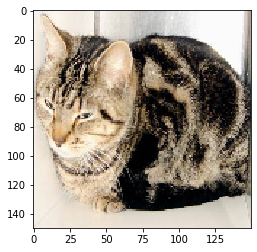

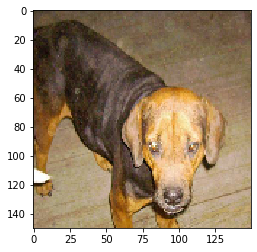

In [6]:
import matplotlib.pyplot as plt 
def showAnimalInTrainGenerator(picNum): 
    firstDim = picNum % 20 
    secondDim = int((picNum-firstDim)/20) 
    poltImage = trainGenerator[secondDim][0][firstDim]#[100][2 0:data(pic) 1:label][20]
    plt.imshow(poltImage, cmap=plt.cm.get_cmap('binary')) 
    plt.show()
    return
def showAnimalInValidationGenerator(picNum): 
    firstDim = picNum % 20     
    secondDim = int((picNum-firstDim)/20) 
    poltImage = validationGenerator[secondDim][0][firstDim]#[50][2 0:data(pic) 1:label][20]
    plt.imshow(poltImage, cmap=plt.cm.get_cmap('binary')) 
    plt.show()
    return
showAnimalInTrainGenerator(1999)
showAnimalInValidationGenerator(999)

In [7]:
#if you want to retrain it, you need to redo the step2
exec(open("4.fitModelSave.pySec").read())


Epoch 1/30
100/100 [==============================] - 7s 70ms/step - loss: 0.6910 - acc: 0.5410 - val_loss: 0.6800 - val_acc: 0.5640
Epoch 2/30
100/100 [==============================] - 5s 54ms/step - loss: 0.6522 - acc: 0.6055 - val_loss: 0.6129 - val_acc: 0.6620
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6100 - acc: 0.6670 - val_loss: 0.6796 - val_acc: 0.6780
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5667 - acc: 0.7060 - val_loss: 0.6212 - val_acc: 0.6090
Epoch 5/30
100/100 [==============================] - 5s 54ms/step - loss: 0.5374 - acc: 0.7250 - val_loss: 0.6044 - val_acc: 0.6900
Epoch 6/30
100/100 [==============================] - 5s 53ms/step - loss: 0.5110 - acc: 0.7425 - val_loss: 0.9329 - val_acc: 0.6220
Epoch 7/30
100/100 [==============================] - 6s 55ms/step - loss: 0.4828 - acc: 0.7725 - val_loss: 0.7101 - val_acc: 0.6980
Epoch 8/30
100/100 [==============================] - 5s 54ms/step -

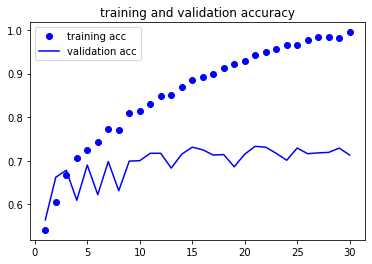

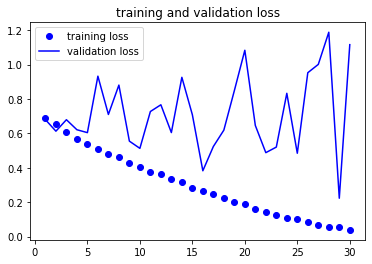

step 5 is complete


In [8]:
exec(open("5.showLossSummary.pySec").read())

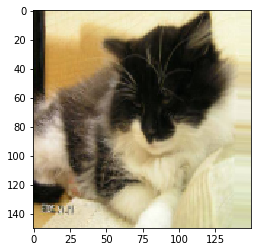

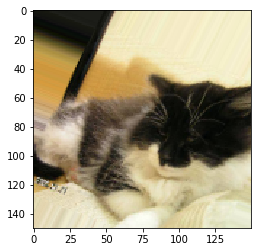

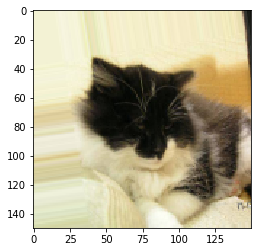

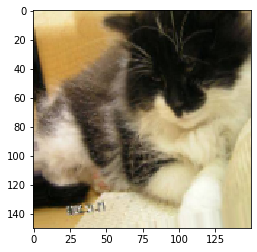

example 6 is complete


In [9]:
exec(open("6.ex.dataAugmentation.pySec").read())

In [10]:
exec(open("7.dropoutModel.pySec").read())

step 7 is complete


In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [13]:
trainDataGen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

testDataGen = ImageDataGenerator(rescale=1./255)

trainGenerator = trainDataGen.flow_from_directory(trainDir, target_size=(150,150), batch_size=32, class_mode='binary')

validationGenerator = testDataGen.flow_from_directory(validationDir, target_size=(150,150), batch_size=32, class_mode='binary')

history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs = 100, validation_data=validationGenerator, validation_steps=50)

model.save("catDogClassfiyDataset2.h5")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6884 - acc: 0.5217 - val_loss: 0.6556 - val_acc: 0.5876
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6703 - acc: 0.5866 - val_loss: 0.6758 - val_acc: 0.6128
Epoch 3/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6536 - acc: 0.6062 - val_loss: 0.5226 - val_acc: 0.6326
Epoch 4/100
100/100 [==============================] - 16s 161ms/step - loss: 0.6219 - acc: 0.6426 - val_loss: 0.6631 - val_acc: 0.6237
Epoch 5/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6175 - acc: 0.6566 - val_loss: 0.5231 - val_acc: 0.6669
Epoch 6/100
100/100 [==============================] - 17s 170ms/step - loss: 0.6109 - acc: 0.6651 - val_loss: 0.6012 - val_acc: 0.6869
Epoch 7/100
100/100 [==============================] - 16s 158ms/step - loss: 0.5942 - acc: 0.6731 -

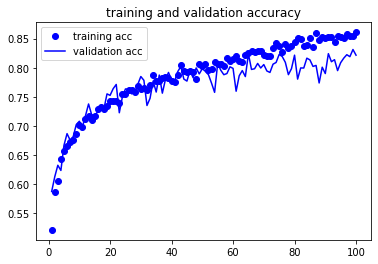

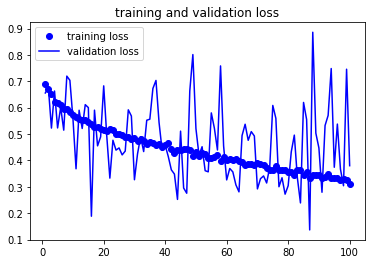

step 5 is complete


In [14]:
exec(open("5.showLossSummary.pySec").read())